# Ramandeep Jagdev

# Git hub = Ramandeep72

# USC ID = 3023879240


In [ ]:
import arff
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import sys
from sklearn.metrics import accuracy_score
from itertools import islice
from sklearn.datasets import make_classification
from sklearn.neighbors import DistanceMetric
from sklearn.datasets import make_classification
from sklearn.neighbors import DistanceMetric
from scipy.io.arff import loadarff

In [2]:
#dataset = arff.load(open('column_2C_weka.arff','r'))
#data = arff.load(open("column_2C_weka.arff", 'r'))

data = loadarff('../data/column_2C_weka.arff') #gives you a huge json file
df = pd.DataFrame(data[0]) # gives you what you are actually looking for 


# 1b i creating scatter plot matrix

In [3]:
#pd.plotting.scatter_matrix(df)
df.replace((b'Abnormal', b'Normal'), (1, 0), inplace=True)
df.to_csv("Master.csv")

/Users/ramandepjagdev/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ramandepjagdev/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


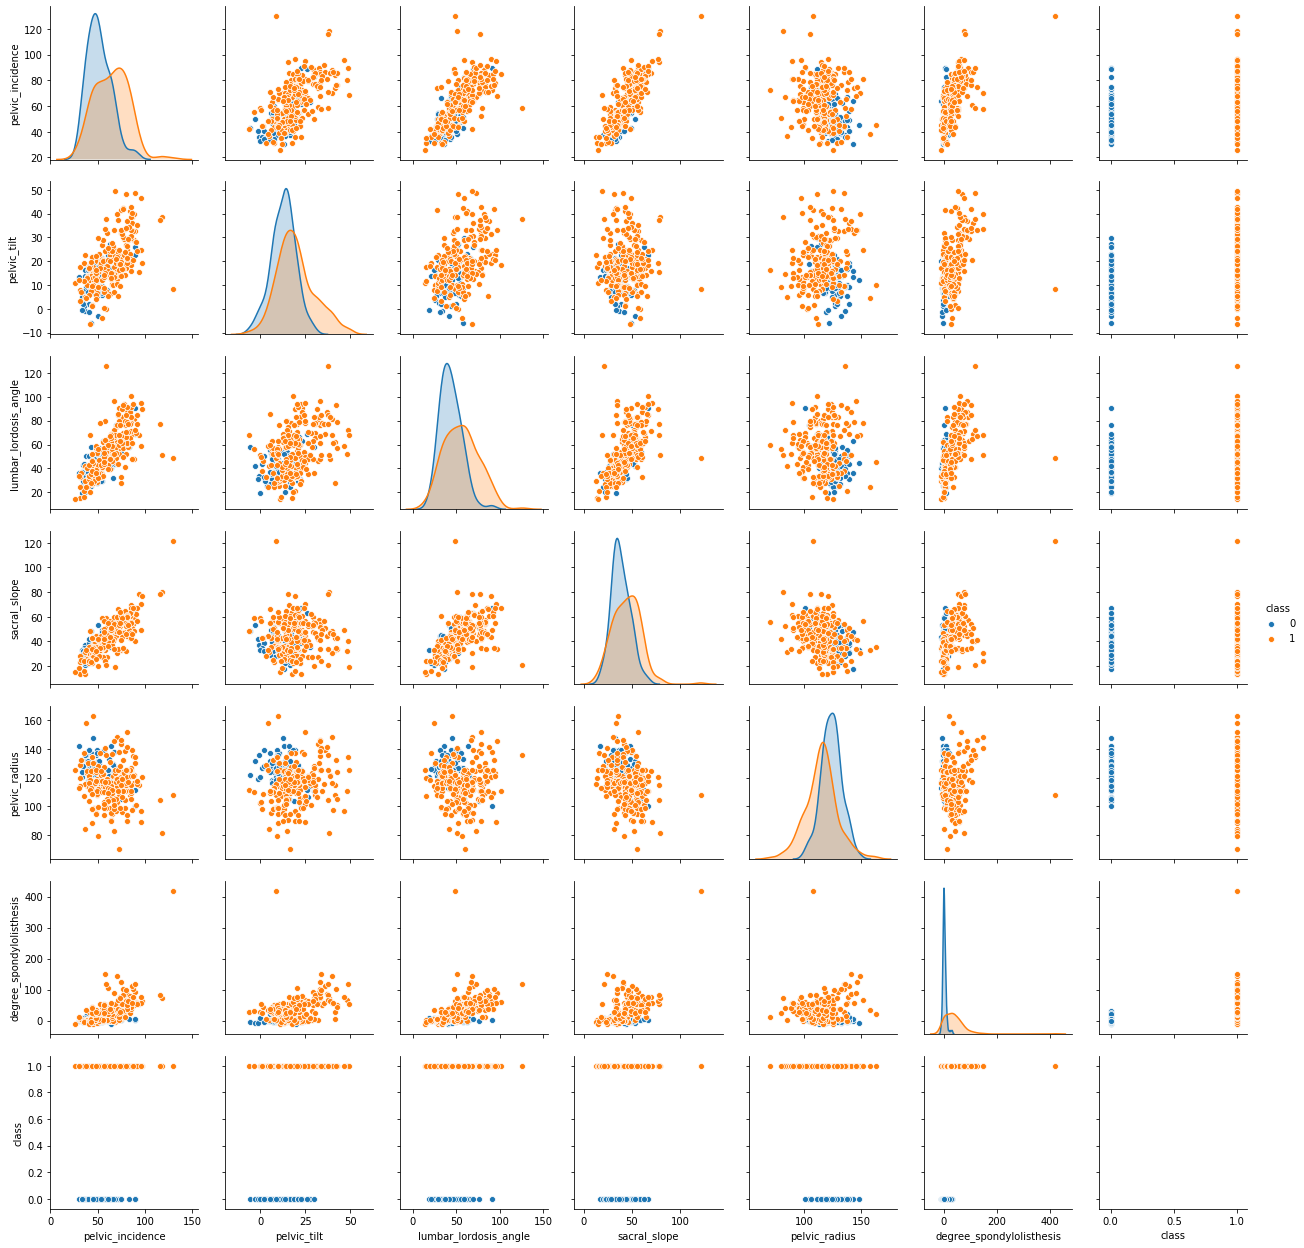

In [4]:
sns.pairplot(df, hue = "class")
#plt.legend(loc='right')
#plt.show()

# 1 b ii boxplots for each independent variable

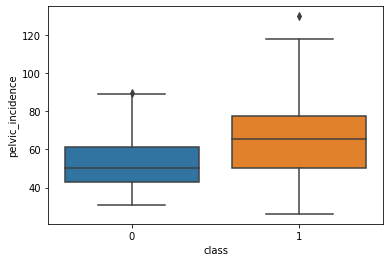

In [5]:
sns.boxplot(x = 'class', y = 'pelvic_incidence', data = df)

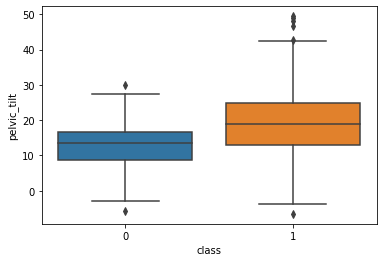

In [6]:
sns.boxplot(x = 'class', y = 'pelvic_tilt', data = df)


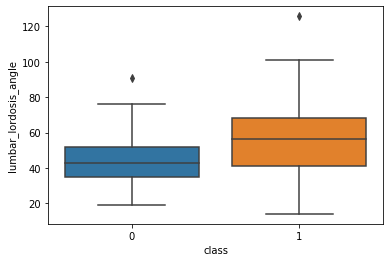

In [7]:
sns.boxplot(x = 'class', y = 'lumbar_lordosis_angle', data = df)


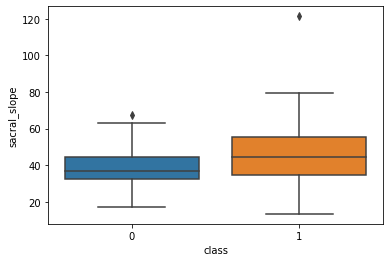

In [8]:
sns.boxplot(x = 'class', y = 'sacral_slope', data = df)


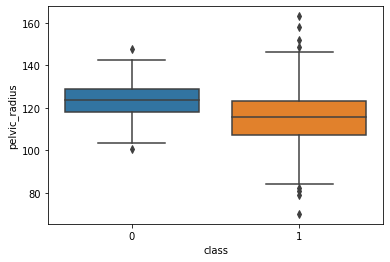

In [9]:
sns.boxplot(x = 'class', y = 'pelvic_radius', data = df)


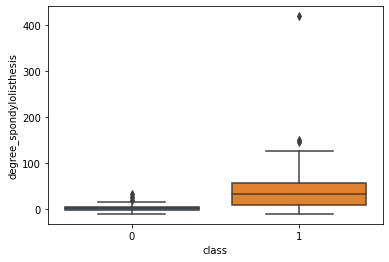

In [10]:
sns.boxplot(x = 'class', y = 'degree_spondylolisthesis', data = df)


# 1b iii first 70 rows of class 0 and first 70 rows of class 1 as training set

In [11]:
#0, first 70 rows as class 0 as training set
x = df.loc[210:279, ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis']]

#1 first 140 rows as class 1 as training set
y = df.loc[0:139, ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis']]



x.to_csv("Check_X.csv")
y.to_csv("Check_y.csv")


In [12]:
frames = [x,y]
X_train = pd.concat(frames)
X_train


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159


In [13]:
#creating y train from above

#class 0, first 70 instances of class 0
x1 = df.loc[210:279, ['class']]

#class1, first 140 instances of class 1 
y2 = df.loc[0:139, ['class']]



frames = [x1,y2]
y_train = pd.concat(frames)
y_train
#np.savetxt("foo.csv", y_train, delimiter=",")
y_train

,class
210,0
211,0
212,0
213,0
214,0
...,...
135,1
136,1
137,1
138,1


# Creating X and Y Test for the rest of the values in the dataset 

In [14]:
#0 rest of the rows rows as class 0 as test set
a = df.loc[280:310, ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis']]


#1 rest of the rows rows as class 1 as test set
b = df.loc[140:209, ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis']]




In [15]:
frames = [a,b]
X_test = pd.concat(frames)
X_test

X_test.to_csv("Check_X_test.csv")

In [16]:
#creating y test from above

a1 = df.loc[280:310, ['class']]

b2 = df.loc[140:209, ['class']]



frames = [a1,b2]
y_test = pd.concat(frames)




y_test.to_csv("Check_Y_test.csv")


#np.savetxt("foo.csv", x, delimiter = ",")


# 1 c i) code for KNN with euclidian metric

In [17]:
k_range = range(208, 1,-3)
scores = {}
scores_list = []

training_accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(1 - metrics.accuracy_score(y_test, y_pred))
    training_accuracy.append(1 -knn.score(X_train, y_train))



/Users/ramandepjagdev/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/ramandepjagdev/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/ramandepjagdev/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/ramandepjagdev/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vect

# 1 c ii) Plotting train and test errors  for k in set{208, 205, 202... 7, 4, 1} 

Text(0, 0.5, 'Error')

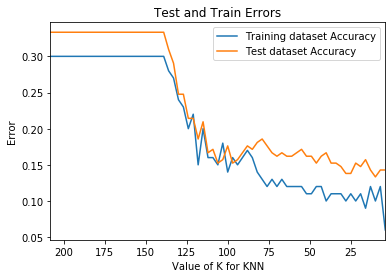

In [18]:
plt.plot(k_range, scores_list, label = 'Training dataset Accuracy')
plt.plot(k_range, training_accuracy , label = 'Test dataset Accuracy')
#goes backwards 
plt.xlim(max(k_range), min(k_range))


plt.title('Test and Train Errors')
plt.legend()

plt.xlabel("Value of K for KNN")
plt.ylabel("Error")



## bias varience trade off point is at k = 14, because test error increases when K is less than this value and it increases when K is more than this value; therefore, K* = 14  is the most suitable K and I will be finding confusion matrix, True positive rate, true negative rate, Precision and F1 score with K = 14

In [19]:
knn = KNeighborsClassifier(n_neighbors=14, metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


/Users/ramandepjagdev/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
#confusion matrix
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        30
           1       0.88      1.00      0.93        70

    accuracy                           0.90       100
   macro avg       0.94      0.83      0.87       100
weighted avg       0.91      0.90      0.89       100



In [21]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

array([[20, 10],
       [ 0, 70]])

In [22]:
Scores_ = []

k_val_1 = []
error_rate_1 = []

k_val = []
error_rate = []
for N in range(10,220,10):
    #(floor n/3 loop for class 0)
    #C0 starts at 0
    C_0_Start = 210
    C_0 = int(N/3)-1
    C_0_X_Train = X_train.loc[C_0_Start : C_0_Start  + C_0, ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis']]
    C_0_y_Train = y_train.loc[C_0_Start : C_0_Start  + C_0, ['class']]
    C_0_Start = C_0_Start + C_0
    #print(len(C_0_X_Train))
    
    #(N- floor(N/3) loop for class 1)
    #C1 starts at 0
    C_1_Start = 0
    C_1 = N - int(N/3) - 1
    C_1_X_Train = X_train.loc[C_1_Start : C_1_Start  + C_1, ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis']]
    C_1_y_Train = y_train.loc[C_1_Start : C_1_Start  + C_1, ['class']]
    C_1_Start = C_1_Start + C_1

    #combine C0 + C1 to form all of N
    
    frames = [C_0_X_Train, C_1_X_Train]
    C_0_and_C_1_combine = pd.concat(frames)
    X = C_0_and_C_1_combine
    #X = np.asarray(X1['pelvic_incidence'])
    
    frames2 = [C_0_y_Train, C_1_y_Train]
    C_0_and_C_1_combine_2 = pd.concat(frames2)
    y1 = C_0_and_C_1_combine_2
    y = np.asarray(y1['class'])
        
    # calculate the Error 
    
    #print("the value of N: " + str(N))
    #print("-----")

    for i in range(1,197,5):
         
        if i > N:
            continue 
        knn = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean', p = 2)
        knn.fit(X, y)
        y_pred = knn.predict(X_test)
            #print(len(y_pred))
            #scores
        scores = metrics.accuracy_score(y_test, y_pred)
        error = 1 - scores
        Scores_.append(error)
        #print("value of K: " +  str(i) )
        #print("error rate:" + str(error))
        
        
        k_val.append(i)
        #print(k_val)
        #print(k_val)
        #rows, cols = (1, int(N/5))
        #arr = [[a*cols]]*rows
        #print(arr)
        error_rate.append(error)
                
    #print("-----")
    
        
#plt.plot(k_range, scores_list , label = 'Test dataset Accuracy')
#goes backwards 
#plt.xlim(max(k_range), min(k_range))

    
    




In [23]:
k_val

length_to_split = [2*i for i in range(1,22)]

Inputt = iter(k_val)
Output = [list(islice(Inputt, elem))
        for elem in length_to_split]

#Output

In [24]:
error_rate

length_to_split = [2*i for i in range(1,22)]

Inputt = iter(error_rate)
Output1 = [list(islice(Inputt, elem))
        for elem in length_to_split]

#Output1

In [25]:
#finding the minimum K value, and most optimal K
#https://scriptjunkiesourav.wordpress.com/2019/07/25/finding-the-lowest-point-in-a-plot-using-text-annotationpython-and-matplotlib/

Best_error_Rate = []
for i in range(0,21,1):

    xaxis = Output[i]
    yaxis = Output1[i]

    min_yaxis = min(yaxis)
    x_co = xaxis[yaxis.index(min_yaxis)]
    #print(min_yaxis)
    #print(x_co)
    Best_error_Rate.append(min_yaxis)

# 1C iii, Plot of the Learning Curve

Text(0, 0.5, 'Test Error')

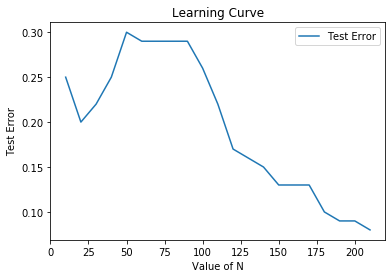

In [26]:
N = range(10,220,10)
plt.plot(N, Best_error_Rate, label = 'Test Error')
#plt.plot(k_range, scores_list , label = 'Test dataset Accuracy')
#goes backwards 
#plt.xlim(max(k_range), min(k_range))

plt.title('Learning Curve')
plt.legend()

plt.xlabel("Value of N")
plt.ylabel("Test Error")

# 1 d i A) Minkowski Distance

## p = 1 is manhattan distance 

In [27]:
#minkowski distance when p = 1
Scores_ = []
K = [i for i in range(1,197,5)]
for i in range(1,197,5):
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 1 )
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    error = 1 - scores
    Scores_.append(error)


In [28]:
table = pd.DataFrame({'K': K, 'Error': Scores_})
table

,K,Error
0,1,0.11
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.12
5,26,0.11
6,31,0.12
7,36,0.13
8,41,0.13
9,46,0.13


Text(0, 0.5, 'Test Error')

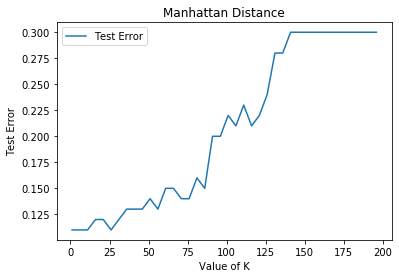

In [29]:
K = range(1,197,5)
plt.plot(K, Scores_, label = 'Test Error')
#plt.plot(k_range, scores_list , label = 'Test dataset Accuracy')
#goes backwards 
#plt.xlim(max(k_range), min(k_range))

plt.title('Manhattan Distance')
plt.legend()

plt.xlabel("Value of K")
plt.ylabel("Test Error")

# 1 d i B)

## k = 26 is the best value of K

In [30]:
Scores_ = []
P = [i for i in range(1,11,1)]

for i in range(1,11,1):
    knn = KNeighborsClassifier(n_neighbors = 26, metric = 'minkowski', p = i )
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    error = 1 - scores
    Scores_.append(error)

In [31]:
table = pd.DataFrame({'P': P, 'Error': Scores_})
table

,P,Error
0,1,0.11
1,2,0.11
2,3,0.11
3,4,0.10
4,5,0.11
5,6,0.11
6,7,0.11
7,8,0.11
8,9,0.11
9,10,0.11


Text(0, 0.5, 'Test Error')

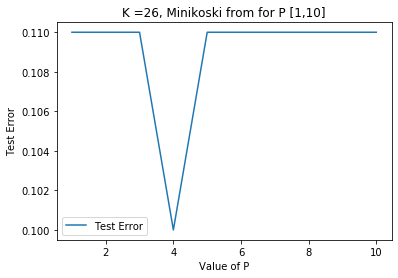

In [32]:
plt.plot(P, Scores_, label = 'Test Error')
#plt.plot(k_range, scores_list , label = 'Test dataset Accuracy')
#goes backwards 
#plt.xlim(max(k_range), min(k_range))

plt.title('K =26, Minikoski from for P [1,10]')
plt.legend()

plt.xlabel("Value of P")
plt.ylabel("Test Error")

## best  log(p) is p = 0.4

# 1 d i c) Cheychev distance

In [33]:
Scores_ = []
K = [i for i in range(1,197,5)]
for i in range(1,197,5):
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'chebyshev' )
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    error = 1 - scores
    Scores_.append(error)

Text(0, 0.5, 'Test Error')

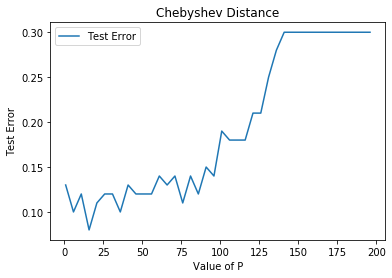

In [34]:
plt.plot(K, Scores_, label = 'Test Error')
#plt.plot(k_range, scores_list , label = 'Test dataset Accuracy')
#goes backwards 
#plt.xlim(max(k_range), min(k_range))
plt.title('Chebyshev Distance')

plt.legend()

plt.xlabel("Value of P")
plt.ylabel("Test Error")

In [35]:
table = pd.DataFrame({'K': K, 'Error': Scores_})
table

,K,Error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.08
4,21,0.11
5,26,0.12
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.12


# 1 e) Manhattan

In [36]:
Scores_ = []
K = [i for i in range(1,197,5)]
for i in range(1,197,5):
    knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance', metric = 'minkowski', p = 1 )
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    error = 1 - scores
    Scores_.append(error)

Text(0, 0.5, 'Test Error')

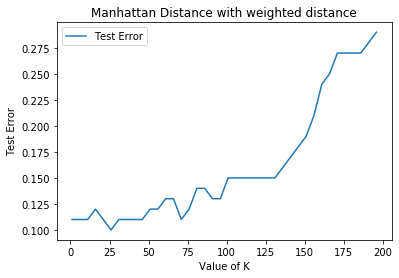

In [37]:
K = range(1,197,5)
plt.plot(K, Scores_, label = 'Test Error')
#plt.plot(k_range, scores_list , label = 'Test dataset Accuracy')
#goes backwards 
#plt.xlim(max(k_range), min(k_range))
plt.title('Manhattan Distance with weighted distance')

plt.legend()

plt.xlabel("Value of K")
plt.ylabel("Test Error")

In [38]:
table = pd.DataFrame({'K': K, 'Error': Scores_})
table

,K,Error
0,1,0.11
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.11
5,26,0.10
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


In [39]:
a = min(Scores_)
print("best score of Manhattan distance = " + str(a))

best score of Manhattan distance = 0.09999999999999998


# 1 e) Euclidean distance

In [40]:
#euclidian
Scores_ = []
K = [i for i in range(1,197,5)]
for i in range(1,197,5):
    knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance', metric = 'euclidean')
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    error = 1 - scores
    Scores_.append(error)

Text(0, 0.5, 'Test Error')

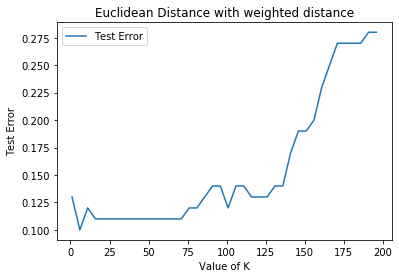

In [41]:
K = range(1,197,5)
plt.plot(K, Scores_, label = 'Test Error')
#plt.plot(k_range, scores_list , label = 'Test dataset Accuracy')
#goes backwards 
#plt.xlim(max(k_range), min(k_range))
plt.title('Euclidean Distance with weighted distance')

plt.legend()

plt.xlabel("Value of K")
plt.ylabel("Test Error")

In [42]:
table = pd.DataFrame({'K': K, 'Error': Scores_})
table

,K,Error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.11
4,21,0.11
5,26,0.11
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


In [43]:
a = min(Scores_)
print("best score of Euclidean distance = " + str(a))

best score of Euclidean distance = 0.09999999999999998


# 1e Chebyshev

In [44]:
Scores_ = []
K = [i for i in range(1,197,5)]
for i in range(1,197,5):
    knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance', metric = 'chebyshev')
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    error = 1 - scores
    Scores_.append(error)

Text(0, 0.5, 'Test Error')

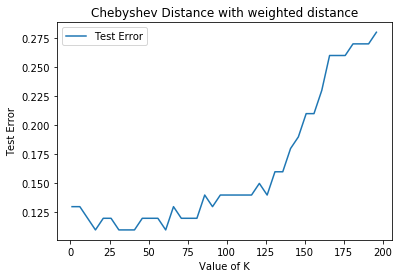

In [45]:
K = range(1,197,5)
plt.plot(K, Scores_, label = 'Test Error')
#plt.plot(k_range, scores_list , label = 'Test dataset Accuracy')
#goes backwards 
#plt.xlim(max(k_range), min(k_range))
plt.title('Chebyshev Distance with weighted distance')

plt.legend()

plt.xlabel("Value of K")
plt.ylabel("Test Error")

In [46]:
table = pd.DataFrame({'K': K, 'Error': Scores_})
table

,K,Error
0,1,0.13
1,6,0.13
2,11,0.12
3,16,0.11
4,21,0.12
5,26,0.12
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.12


In [47]:
a = min(Scores_)
print("best score of Chebyshev distance = " + str(a))

best score of Chebyshev distance = 0.10999999999999999


# 1 d ii) Mahalanobis distance

In [48]:
X, y = make_classification(n_samples = 210)

In [49]:
X_test, y_test = make_classification()

In [50]:
DistanceMetric.get_metric('mahalanobis', V=np.cov(X))

/Users/ramandepjagdev/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


In [51]:
DistanceMetric.get_metric('mahalanobis', V=np.cov(X_test))

In [52]:
Scores_ = []
K = [i for i in range(1,197,5)]
for i in range(1,197,5):
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'mahalanobis', metric_params={'VI': np.cov(X, rowvar = False)} )
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    error = 1 - scores
    Scores_.append(error)

Text(0, 0.5, 'Test Error')

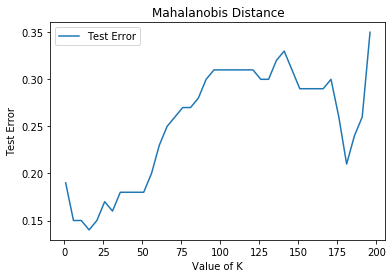

In [53]:
K = range(1,197,5)
plt.plot(K, Scores_, label = 'Test Error')
#plt.plot(k_range, scores_list , label = 'Test dataset Accuracy')
#goes backwards 
#plt.xlim(max(k_range), min(k_range))
plt.title('Mahalanobis Distance')

plt.legend()

plt.xlabel("Value of K")
plt.ylabel("Test Error")

In [54]:
table = pd.DataFrame({'K': K, 'Error': Scores_})
table

,K,Error
0,1,0.19
1,6,0.15
2,11,0.15
3,16,0.14
4,21,0.15
5,26,0.17
6,31,0.16
7,36,0.18
8,41,0.18
9,46,0.18


# 1F) Lowest test error I obtained was 0.10 from euclidean and manhattan distance were majority polling was switched to weighted polling, I would say Manhattan distance was the better metric even though both manhattan and euclidean distance had the same lowest test error. however, Manhattan distance was able to obtain the same error at K = 26 vs euclidean distance achiving this when K = 6, which is a low value of K, low value of K's can be prone to overfitting